# Exploratory Data Analysis (EDA)
This notebook explores the credit risk dataset to uncover patterns, identify data quality issues, and form hypotheses for feature engineering. This is for exploration only and not for production code.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Load the Data
Load the raw transaction data for analysis.

In [2]:
# Load the dataset (adjust path if needed)
df = pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## 2. Overview of the Data
Understand the structure: number of rows, columns, and data types.

In [3]:
# Shape and data types
df_shape = df.shape
df_info = df.dtypes
df_shape, df_info

((95662, 16),
 TransactionId            object
 BatchId                  object
 AccountId                object
 SubscriptionId           object
 CustomerId               object
 CurrencyCode             object
 CountryCode               int64
 ProviderId               object
 ProductId                object
 ProductCategory          object
 ChannelId                object
 Amount                  float64
 Value                     int64
 TransactionStartTime     object
 PricingStrategy           int64
 FraudResult               int64
 dtype: object)

## 3. Summary Statistics
Examine central tendency, dispersion, and shape of distributions for numerical features.

In [4]:
# Summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


## 4. Distribution of Numerical Features
Visualize distributions to identify patterns, skewness, and outliers.

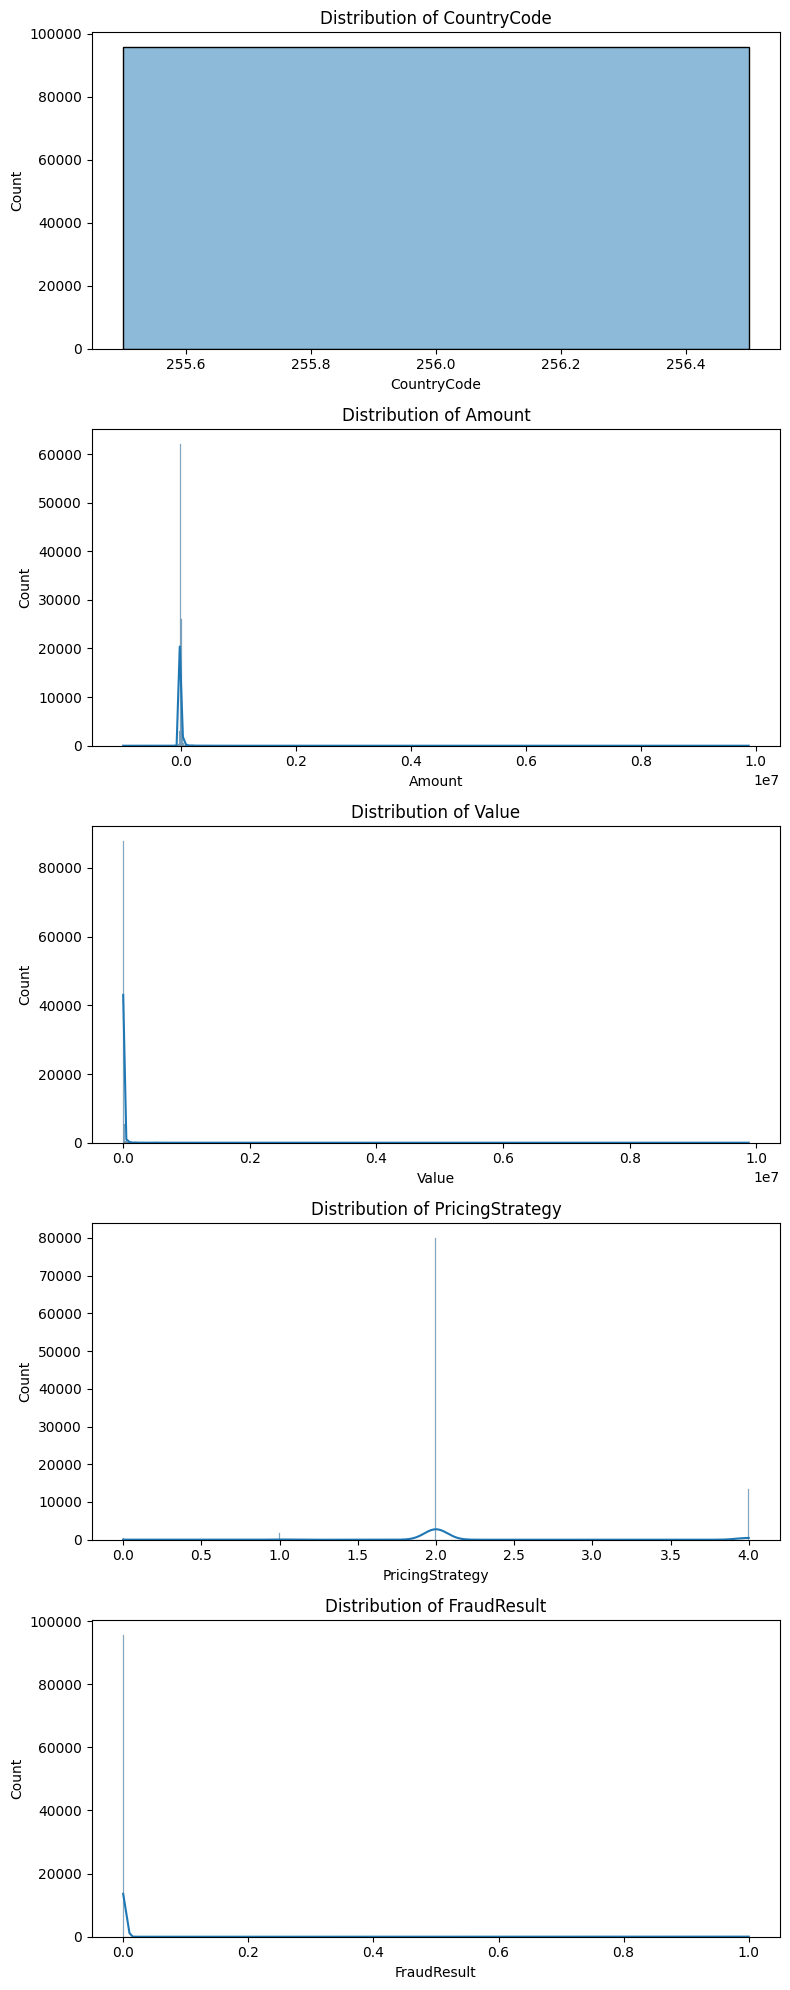

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4*len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 5. Distribution of Categorical Features
Analyze frequency and variability of categories.

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts().head(10))


TransactionId value counts:
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64

BatchId value counts:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64

AccountId value counts:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

SubscriptionId value counts:
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457


## 6. Correlation Analysis
Examine relationships between numerical features.

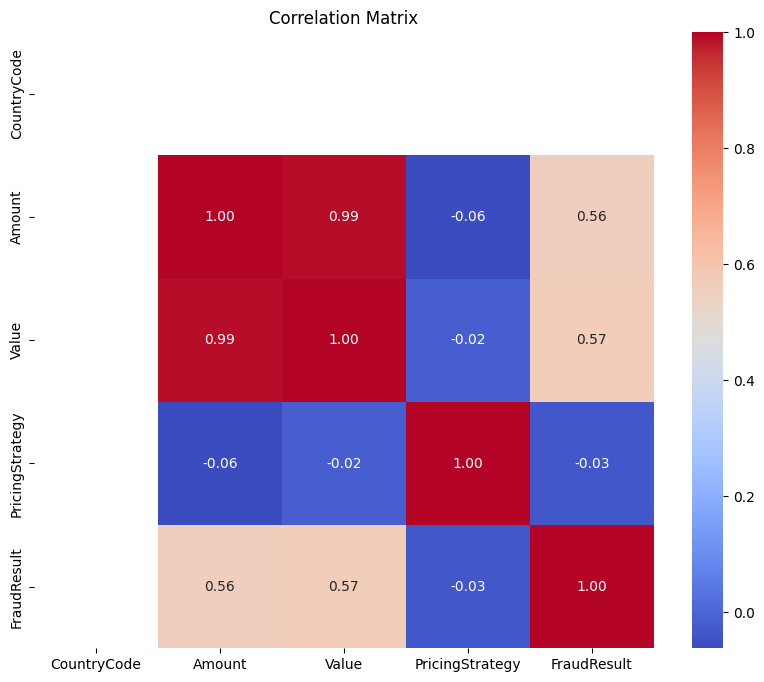

In [7]:
# Correlation matrix and heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 7. Identifying Missing Values
Check for missing data and decide on imputation strategies.

In [8]:
# Missing values summary
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

## 8. Outlier Detection
Use box plots to identify outliers in numerical features.

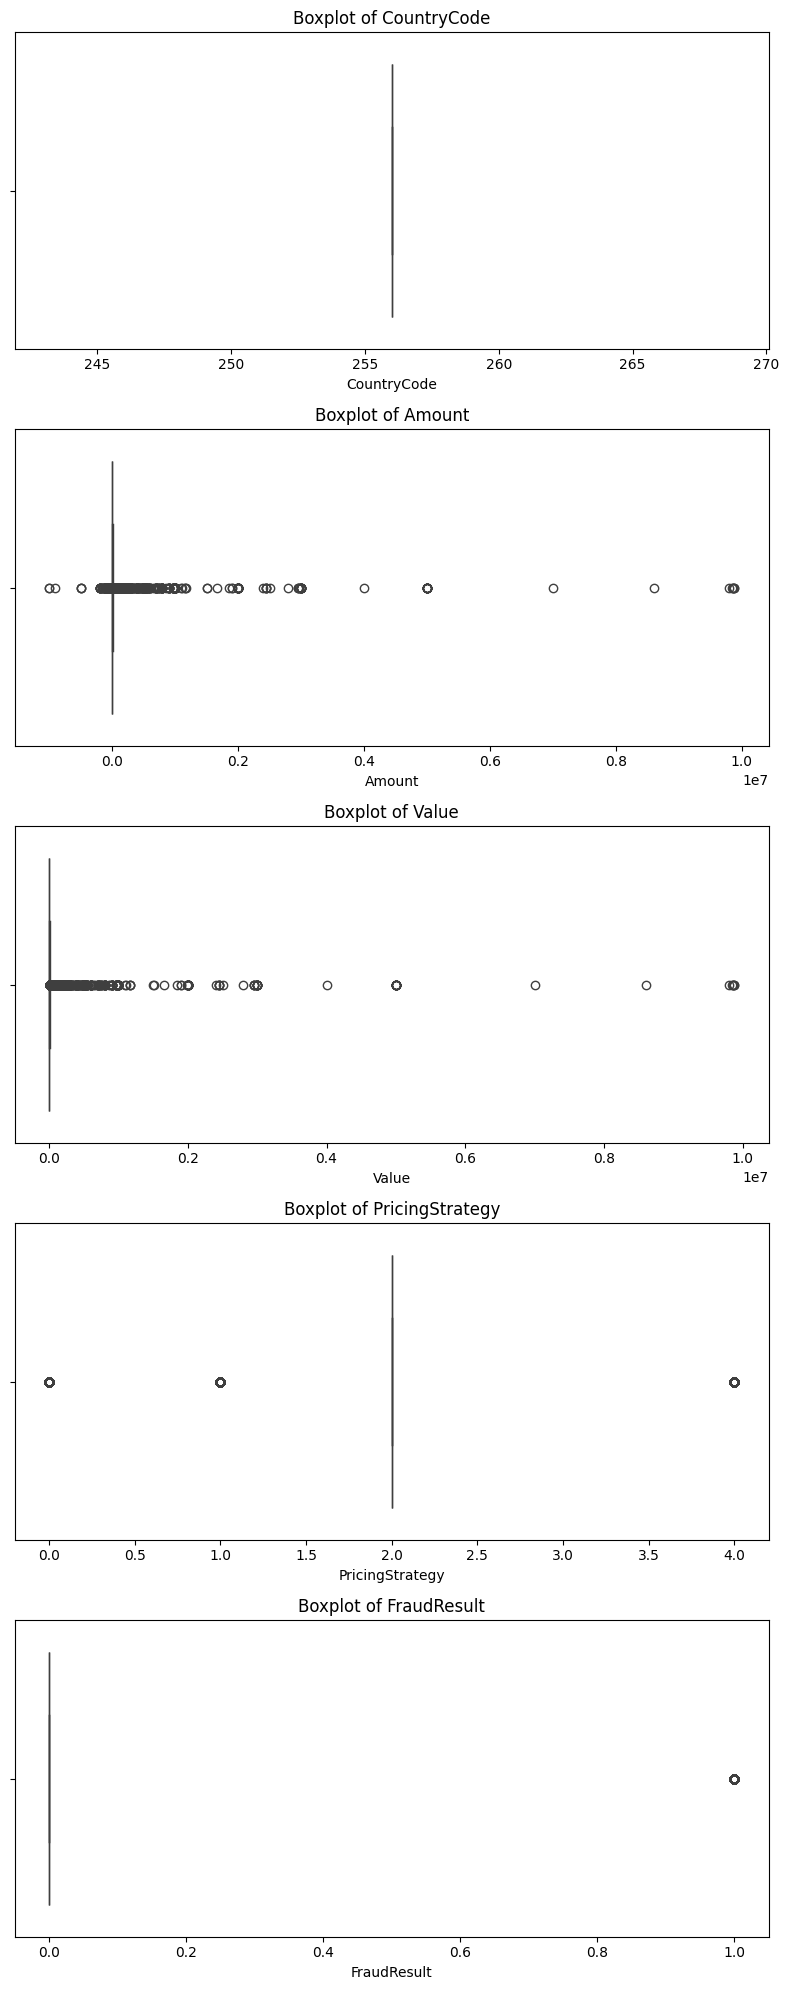

In [9]:
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4*len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Top EDA Insights:**

1. The transaction amount is heavily right-skewed with significant outliers. Log transformation may be needed.
2. Customer activity is highly concentrated in specific product categories and channels.
3. No strong linear relationship between transaction amount and fraud; non-linear models may be required.
4. The dataset is complete with no missing values, simplifying preprocessing.
5. Time-based patterns may exist and should be explored in feature engineering.